In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Renewable_Energy_Adoption.csv')
data.head()

print(data.shape)
data.isnull().sum()

adoption_count=data['adoption'].value_counts()
print(adoption_count)

(100, 5)
adoption
0    85
1    15
Name: count, dtype: int64


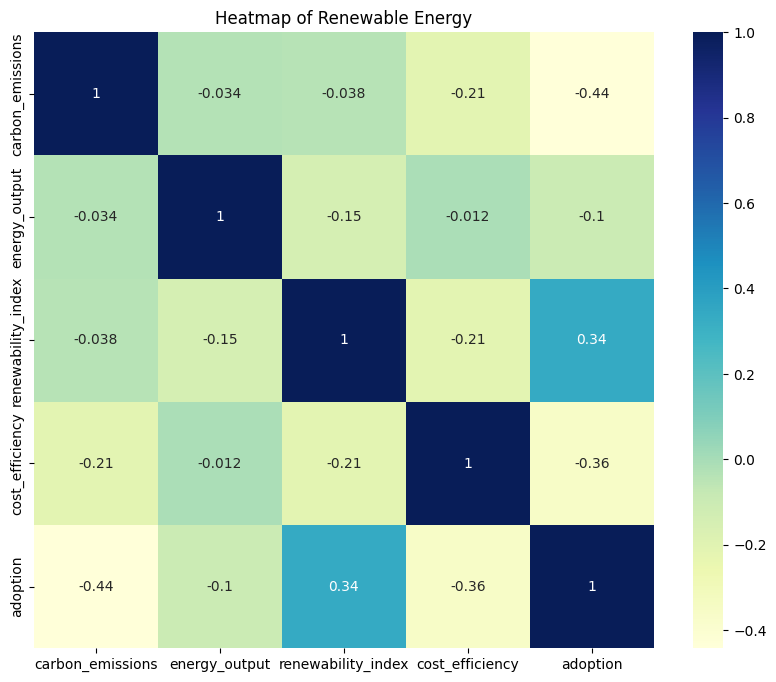

In [ ]:
plt.figure(figsize=(10, 8))
numerical_columns = data.select_dtypes(include=np.number).columns
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.title("Heatmap of Renewable Energy")
plt.show()

Text(0, 0.5, 'Energy Output')

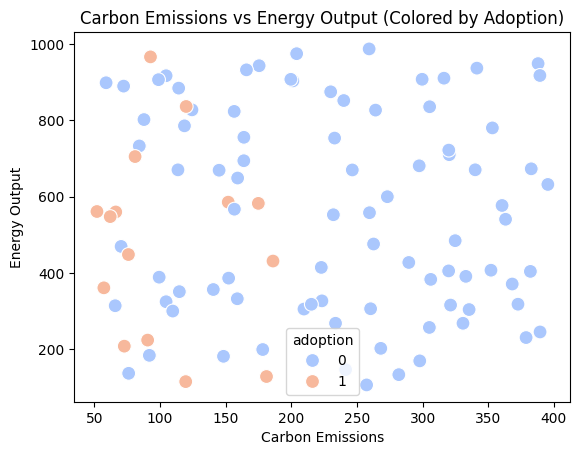

In [ ]:
# Scatter plot with filter for adoption
sns.scatterplot(data=data, x='carbon_emissions', y='energy_output', hue='adoption', palette='coolwarm', s=100)

# Add title and labels
plt.title("Carbon Emissions vs Energy Output (Colored by Adoption)")
plt.xlabel("Carbon Emissions")
plt.ylabel("Energy Output")

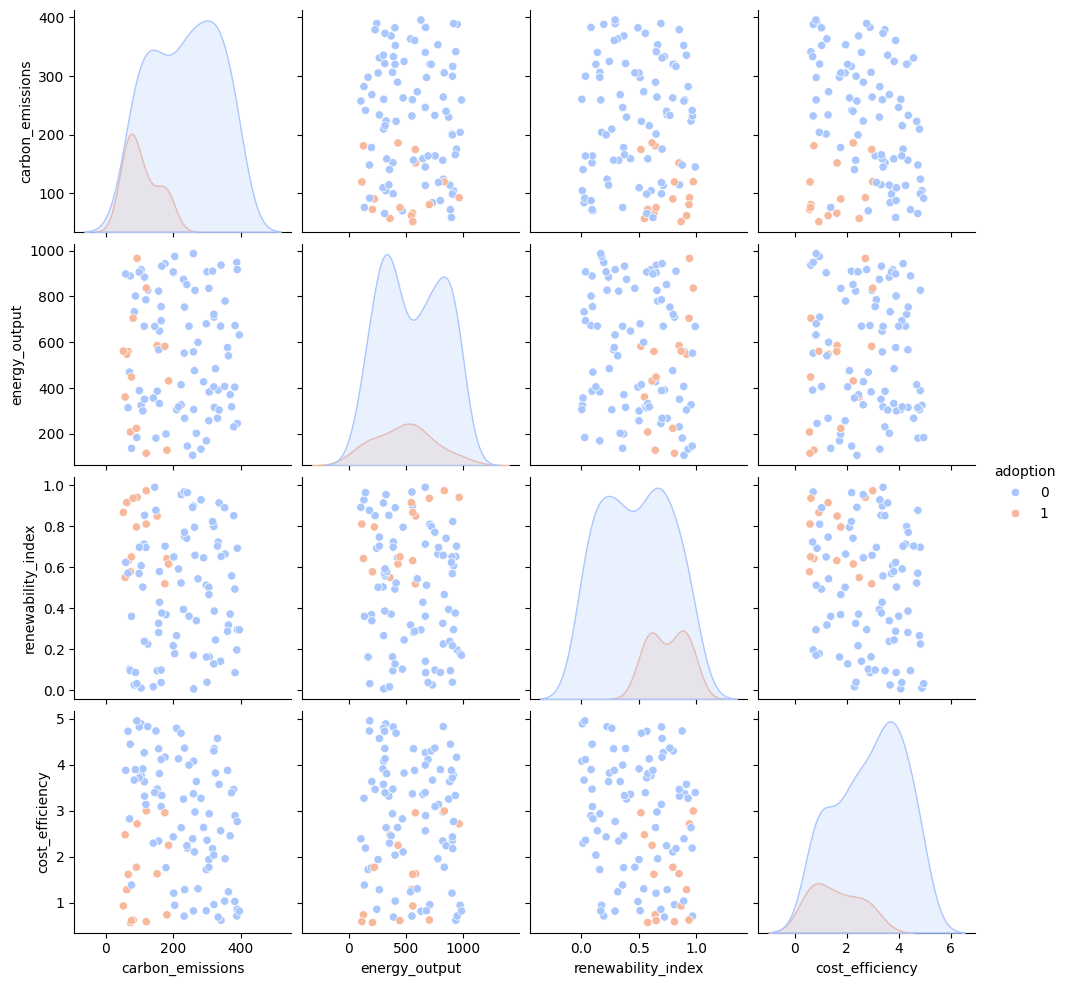

In [ ]:
sns.pairplot(data,hue='adoption', palette='coolwarm')
plt.show()

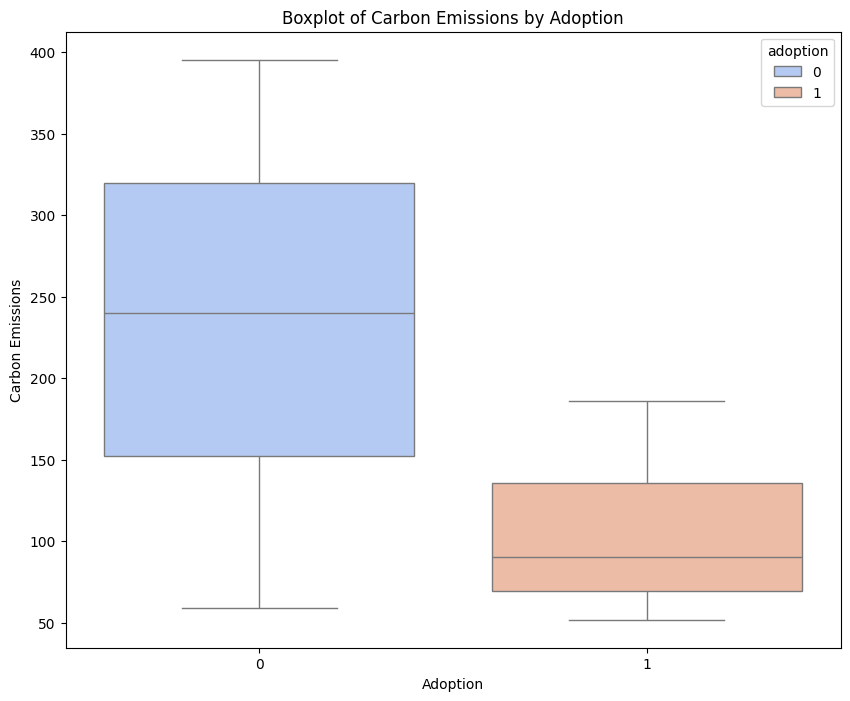

In [ ]:
from pandas.plotting import boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(data=data, x='adoption', y='carbon_emissions',hue='adoption', palette='coolwarm')
plt.title("Boxplot of Carbon Emissions by Adoption")
plt.xlabel("Adoption")
plt.ylabel("Carbon Emissions")
plt.show()

In [ ]:
x=data[['carbon_emissions','energy_output','renewability_index','cost_efficiency']]
y=data['adoption'] #target variable

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=DecisionTreeClassifier(max_depth=3,random_state=42)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [ ]:
# accuracy
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy : ",accuracy)

Accuracy :  0.85


Confusion Matrix : 
 [[16  1]
 [ 2  1]]


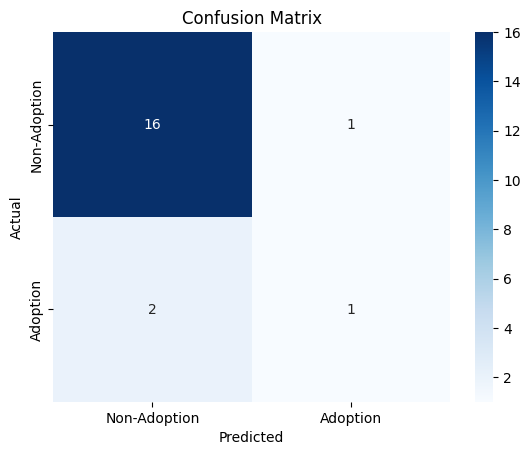

In [ ]:
# confusion matrix
conf_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix : \n",conf_matrix)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',
            xticklabels=['Non-Adoption','Adoption'],
            yticklabels=['Non-Adoption','Adoption'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print(classification_report(y_test,y_pred,target_names=['Non-Adoption','Adoption']))

              precision    recall  f1-score   support

Non-Adoption       0.89      0.94      0.91        17
    Adoption       0.50      0.33      0.40         3

    accuracy                           0.85        20
   macro avg       0.69      0.64      0.66        20
weighted avg       0.83      0.85      0.84        20



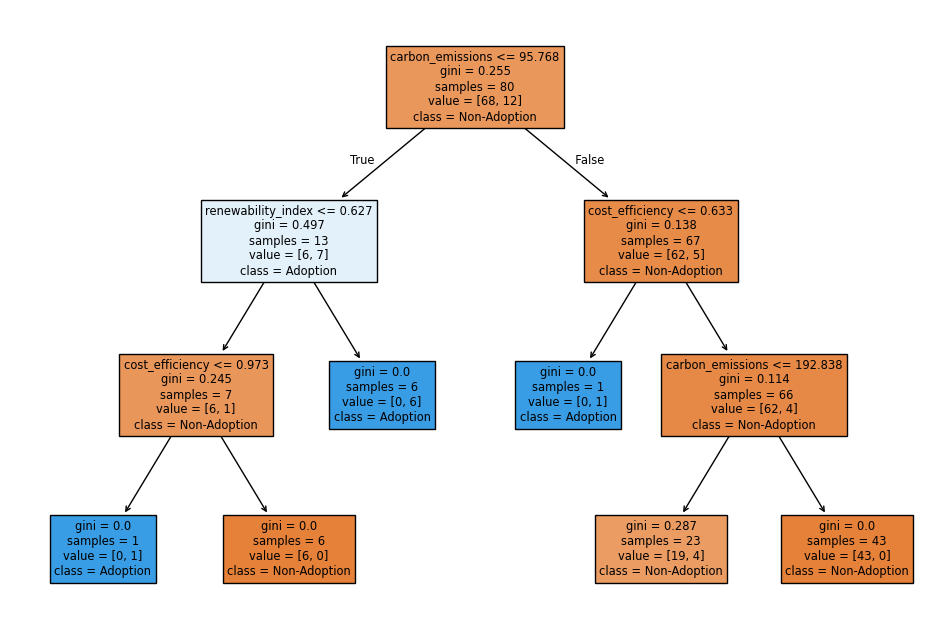

In [ ]:
import joblib
joblib.dump(model,'Renewable_Energy_Adoption_model.pkl')
plt.figure(figsize=(12,8))
plot_tree(model,feature_names=x.columns,class_names=['Non-Adoption','Adoption'],filled=True)
plt.savefig('td1.png')
plt.show()